In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('concrete.csv')

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
from sklearn.preprocessing import Normalizer

df2 = Normalizer().fit_transform(df)
df2 = pd.DataFrame(df2)
df2

,0,1,2,3,4,5,6,7,8
0,0.111269,0.166942,0.000000,0.160249,0.000000,0.765257,0.589416,0.022049,0.023537
1,0.123388,0.030829,0.090806,0.115645,0.007890,0.789569,0.581657,0.010228,0.017175
2,0.188137,0.000000,0.072019,0.141027,0.004139,0.720111,0.648093,0.021071,0.021989
3,0.220434,0.094472,0.000000,0.188944,0.000000,0.772349,0.555229,0.023204,0.037996
4,0.119480,0.141555,0.000000,0.149196,0.007024,0.808423,0.537739,0.021611,0.014117
...,...,...,...,...,...,...,...,...,...
1025,0.105072,0.000000,0.129200,0.140096,0.007783,0.747959,0.626542,0.021793,0.010344
1026,0.392784,0.000000,0.000000,0.104831,0.020848,0.629947,0.660701,0.002218,0.030533
1027,0.227165,0.095337,0.074215,0.147608,0.007315,0.715110,0.631444,0.023012,0.036392
1028,0.273482,0.030387,0.000000,0.182321,0.000000,0.745279,0.535769,0.215907,0.044029


In [6]:
X = df2.iloc[:,:8]

In [7]:
y=df2.iloc[:,8:]

In [8]:
X.head()

,0,1,2,3,4,5,6,7
0,0.111269,0.166942,0.000000,0.160249,0.000000,0.765257,0.589416,0.022049
1,0.123388,0.030829,0.090806,0.115645,0.007890,0.789569,0.581657,0.010228
2,0.188137,0.000000,0.072019,0.141027,0.004139,0.720111,0.648093,0.021071
3,0.220434,0.094472,0.000000,0.188944,0.000000,0.772349,0.555229,0.023204
4,0.119480,0.141555,0.000000,0.149196,0.007024,0.808423,0.537739,0.021611


In [9]:
y.head()

,8
0,0.023537
1,0.017175
2,0.021989
3,0.037996
4,0.014117


In [10]:
#Q-1.Try to identify the various patterns between inputs and output.
#ANS-1.WE WILL CHECK multicollinearity AND THEN VISUALIZE THE PATTERNS
#Check for multicollinearity
#We get less variance_inflation_factor for columns index 1,2,4,7
X1=X
import numpy as np
X1 = np.array(X1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X1, i) for i in range(X1.shape[1])]
vif

[15.229736835039063,
 3.4422542118778217,
 4.155409480198613,
 79.71718322439241,
 5.426055391925735,
 84.67589012649955,
 72.23838841153335,
 1.7189950205404234]

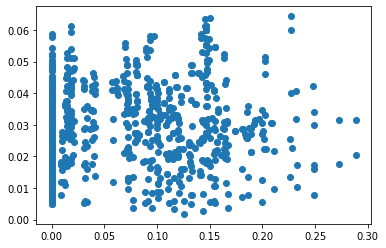

In [11]:
plt.scatter(X[1],y)

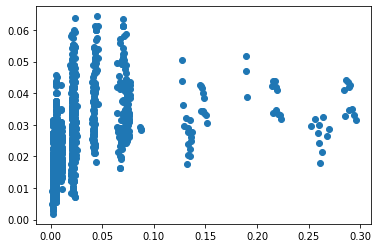

In [12]:
plt.scatter(X[7],y)

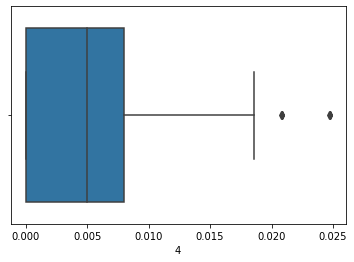

In [13]:
#Q-2Provide us the Data Quality Report like Normal Distribution, Outliers, 
#Skewness, Kurtosis, Comparisons between columns, relationships between columns, trends, etc. 
#ANS-1  OUTLIERS IN CLOUMNS visualizing
import seaborn as sns
sns.boxplot(x=X[4])

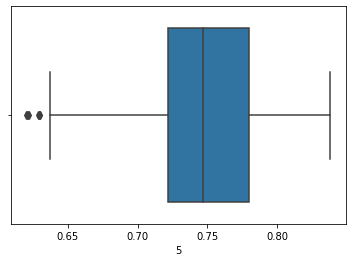

In [14]:
sns.boxplot(x=X[5])

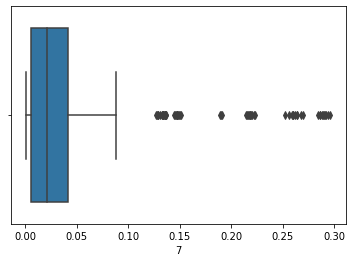

In [15]:
sns.boxplot(x=X[7])

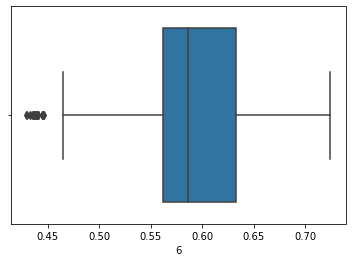

In [16]:
sns.boxplot(x=X[6])

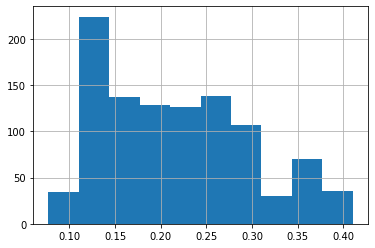

In [20]:
X[0].hist()

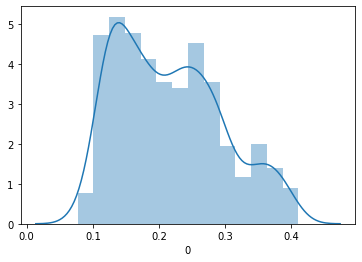

In [21]:
import seaborn as sns
sns.distplot(X[0])

In [75]:
import statsmodels.api as sm

In [76]:
#REPORT OF DATASET AS IN STATISTICS MODEL

results_1 = sm.OLS(y,X).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      8   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:56:13   Log-Likelihood:                          3516.1
No. Observations:                1030   AIC:                                     -7016.
Df Residuals:                    1022   BIC:                                     -6977.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1126      0.004     26.590      0.000       0.104       0.121
1              0.0947      0.005     18.398      0.000       0.085       0.105
2              0.0764      0.008      9.793      0.000       0.061       0.092
3             -0.1751      0.016    -11.119      0.000      -0.206      -0.144
4              0.2825      0.088      3.221      0.001       0.110       0.455
5              0.0092      0.003      2.994      0.003       0.003       0.015
6              0.0116      0.004      3.255      0.001       0.005       0.019
7              0.1136      0.005     20.733      0.000       0.103       0.124
==============================================================================
Omnibus:                        4.340   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.276
Skew:                          -0.157   Prob(JB):                        0.118
Kurtosis:                       3.028   Cond. No.                         351.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""